In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv
from scipy.signal import resample
from google.colab.patches import cv2_imshow

Mounted at /content/drive


In [ ]:
root = '/content/drive/MyDrive/Final Year Project  /Training Data/PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0/'

In [ ]:
conts = os.listdir(root + "ExpertsSegmentations/Contours/")

In [ ]:
dataOG=[]
for i in conts:
  c = np.loadtxt(root + 'ExpertsSegmentations/Contours/'+ i)
  dataOG.append(c)

KeyboardInterrupt: ignored

In [ ]:
lowest = 100
highest =0
mean=0

In [ ]:
for i in range(len(conts)):
  if(len(dataOG[i])>highest):
    highest = len(dataOG[i])
  if(len(dataOG[i])<lowest):
    lowest = len(dataOG[i])
  mean += len(dataOG[i])
mean = mean/len(conts)

In [ ]:
print(lowest)
print(highest)
print(mean)

5
75
16.392418032786885


In [ ]:
target_size = 16

for i in range(len(dataOG)):
    current_size = dataOG[i].shape[0]

    if current_size > target_size:
        factor = int(current_size / target_size)
        dataOG[i] = resample(dataOG[i], target_size, axis=0)

    elif current_size < target_size:
        factor = int(target_size / current_size)
        dataOG[i] = np.repeat(dataOG[i], factor, axis=0)
        dataOG[i] = resample(dataOG[i], target_size, axis=0)

In [ ]:
for i in range(len(conts)):
  np.savetxt((root+'ExpertsSegmentations/Fixed/'+ conts[i]), dataOG[i], delimiter=",")

In [ ]:
conts = sorted(os.listdir(root + "ExpertsSegmentations/Fixed/"))

In [ ]:
data=[]
done= 0
for i in conts:
  c = np.loadtxt(root + 'ExpertsSegmentations/Fixed/'+ i ,delimiter=',')
  data.append(c)
  done +=1
  print(str(int(done/1952*100))+"%")
data = np.array(data)

0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
2%
2%
2%
2%
2%
2%
2%
2%
2%
2%
2%
2%
2%
2%
2%
2%
2%
2%
2%
3%
3%
3%
3%
3%
3%
3%
3%
3%
3%
3%
3%
3%
3%
3%
3%
3%
3%
3%
3%
4%
4%
4%
4%
4%
4%
4%
4%
4%
4%
4%
4%
4%
4%
4%
4%
4%
4%
4%
5%
5%
5%
5%
5%
5%
5%
5%
5%
5%
5%
5%
5%
5%
5%
5%
5%
5%
5%
5%
6%
6%
6%
6%
6%
6%
6%
6%
6%
6%
6%
6%
6%
6%
6%
6%
6%
6%
6%
7%
7%
7%
7%
7%
7%
7%
7%
7%
7%
7%
7%
7%
7%
7%
7%
7%
7%
7%
7%
8%
8%
8%
8%
8%
8%
8%
8%
8%
8%
8%
8%
8%
8%
8%
8%
8%
8%
8%
9%
9%
9%
9%
9%
9%
9%
9%
9%
9%
9%
9%
9%
9%
9%
9%
9%
9%
9%
9%
10%
10%
10%
10%
10%
10%
10%
10%
10%
10%
10%
10%
10%
10%
10%
10%
10%
10%
10%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
13%
13%
13%
13%
13%
13%
13%
13%
13%
13%
13%
13%
13%
13%
13%
13%
13%
13%
13%
13%
14%
14%
14%
14%
14%
14%
14%
14%
14%
14%
14%
14%
14%
14%
14%
14%
14%
14%
14%
15%
15%
15%
15%
15%
15%
15%

In [ ]:
np.savetxt((root+'ExpertsSegmentations/Fixed/'+ conts[i]), data, delimiter=",")

In [ ]:
concatenated_list = []

# Loop through the original list in steps of 2
for i in range(0, len(data)-1, 4):
    # Get the arrays to concatenate
    first_array = data[i]
    second_array = data[i+1]
    third_array = data[i+2]
    fourth_array = data[i+3]

    # Concatenate the arrays and add the result to the new list
    concatenated_array1 = np.concatenate((first_array, third_array), axis=0)
    concatenated_array1 = np.reshape(concatenated_array1, (2, 16, 2))
    concatenated_list.append(concatenated_array1)

    concatenated_array2 = np.concatenate((second_array, fourth_array), axis=0)
    concatenated_array2 = np.reshape(concatenated_array2, (2, 16, 2))
    concatenated_list.append(concatenated_array2)
concatenated_array = np.array(concatenated_list)
# The final concatenated list should contain one concatenated array for each pair of arrays
# and each array should be of shape (2, 16, 2)
print(len(concatenated_list)) # should be 976
print(concatenated_list[0].shape) # should be (2, 16, 2)


976
(2, 16, 2)


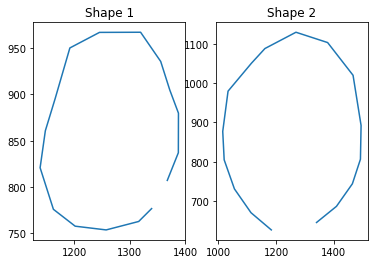

In [ ]:
first_concatenated_array = concatenated_array[2]

# Get the two subarrays representing the two shapes
shape_1 = first_concatenated_array[0]
shape_2 = first_concatenated_array[1]

# Extract the x and y coordinates for each shape
shape_1_x = shape_1[:, 0]
shape_1_y = shape_1[:, 1]
shape_2_x = shape_2[:, 0]
shape_2_y = shape_2[:, 1]

# Create a new plot with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first shape on the left subplot
ax1.plot(shape_1_x, shape_1_y)
ax1.set_title('Shape 1')

# Plot the second shape on the right subplot
ax2.plot(shape_2_x, shape_2_y)
ax2.set_title('Shape 2')

# Show the plot
plt.show()

In [ ]:
np.savetxt((root + 'ExpertsSegmentations/FixedConcatenated/concatenated_array_averaged.csv'), concatenated_array.reshape(-1, 32), delimiter=",") 

In [ ]:
concatenated_array = np.loadtxt(root+'/ExpertsSegmentations/FixedConcatenated/concatenated_array_averaged.csv', delimiter=',')
concatenated_array = concatenated_array.reshape(-1, 2, 16, 2)
print(concatenated_array.shape)

(488, 2, 16, 2)


In [ ]:
img_names = sorted(os.listdir(root + "FundusImages"))
output = root+'FundusImagesResized'
resized_coords = np.zeros(concatenated_array.shape)
target_size = (256, 256)
done = 0
for i in img_names:
  image = (cv.imread(root + "FundusImages/" + i))

  h, w = image.shape[:2]

  ratio = min(target_size[0] / w, target_size[1] / h)

  new_size = (round(w * ratio), round(h * ratio))

  resized = cv.resize(image, new_size)

  background = np.zeros(target_size[::-1] + (3,), dtype=np.uint8)

  x_offset = (target_size[0] - new_size[0]) // 2
  y_offset = (target_size[1] - new_size[1]) // 2

  background[y_offset:y_offset+new_size[1], x_offset:x_offset+new_size[0]] = resized
  x_ratio = new_size[0] / w
  y_ratio = new_size[1] / h
  for j in range(concatenated_array.shape[1]):
      for k in range(concatenated_array.shape[2]):
          for l in range(concatenated_array.shape[3]):
              if l == 0:
                  # Adjust X coordinate
                  newX1 = int(concatenated_array[done*2, j, k, l] * x_ratio)
                  newX2 = int(concatenated_array[done*2+1, j, k, l] * x_ratio) 
                  resized_coords[done*2, j, k, l] = newX1
                  resized_coords[done*2+1, j, k, l] = newX2
              else:
                  # Adjust Y coordinate
                  newY1 = int(concatenated_array[done*2, j, k, l] * y_ratio) +32
                  newY2 = int(concatenated_array[done*2+1, j, k, l] * y_ratio)+32 
                  resized_coords[done*2, j, k, l] = newY1
                  resized_coords[done*2+1, j, k, l] = newY2

  cv.imwrite(output+'/'+ i, background)
  done+= 1
  print(str(int(100* (done/488)))+'% done')

In [ ]:
x_ratio = new_size[0] / w
y_ratio = new_size[1] / h
resized_coords = np.zeros(concatenated_array.shape)
for i in range(488):
    for j in range(concatenated_array.shape[1]):
        for k in range(concatenated_array.shape[2]):
            for l in range(concatenated_array.shape[3]):
                if l == 0:
                    # Adjust X coordinate
                    newX1 = int(concatenated_array[i*2, j, k, l] * x_ratio)
                    newX2 = int(concatenated_array[i*2+1, j, k, l] * x_ratio) 
                    resized_coords[i*2, j, k, l] = newX1
                    resized_coords[i*2+1, j, k, l] = newX2
                else:
                    # Adjust Y coordinate
                    resized_coords[i*2, j, k, l] = int((concatenated_array[i*2, j, k, l] * y_ratio) +32)
                    resized_coords[i*2+1, j, k, l] = int((concatenated_array[i*2+1, j, k, l] * y_ratio)+32)

In [ ]:
resized_coords = np.round(resized_coords).astype(np.int32)
np.savetxt((root + 'ExpertsSegmentations/FixedConcatenatedResized/concatenated_array.csv'), resized_coords.reshape(-1, 32), delimiter=",") 

In [ ]:
resized_coords = np.loadtxt(root + 'ExpertsSegmentations/FixedConcatenatedResized/concatenated_array.csv', delimiter=',')
resized_coords = resized_coords.reshape(-1, 2, 16, 2)
print(resized_coords.shape)

(976, 2, 16, 2)


In [ ]:
resized_coords = np.round(resized_coords).astype(np.int32)

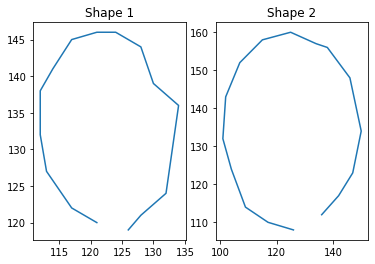

In [ ]:
first_concatenated_array = resized_coords[0]

# Get the two subarrays representing the two shapes
shape_1 = first_concatenated_array[0]
shape_2 = first_concatenated_array[1]

# Extract the x and y coordinates for each shape
shape_1_x = shape_1[:, 0]
shape_1_y = shape_1[:, 1]
shape_2_x = shape_2[:, 0]
shape_2_y = shape_2[:, 1]

# Create a new plot with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first shape on the left subplot
ax1.plot(shape_1_x, shape_1_y)
ax1.set_title('Shape 1')

# Plot the second shape on the right subplot
ax2.plot(shape_2_x, shape_2_y)
ax2.set_title('Shape 2')

# Show the plot
plt.show()

In [ ]:
concatenated_array = concatenated_array[::2]

In [ ]:
output = root+'/ExpertsSegmentations/Masks'

In [ ]:
img_names = sorted(os.listdir(root + "FundusImages"))
output = root+'/ExpertsSegmentations/Masks'
image_size = (256, 256)
done = 0
for i in img_names:
  mask = np.zeros(image_size, dtype=np.uint8)
  cv.fillPoly(mask, [resized_coords[done][0]], color=1)
  cup_mask = mask.copy()  # Save a copy of the mask for later use
  mask.fill(0)  # Reset the mask to all zeros
  cv.fillPoly(mask, [resized_coords[done][1]], color=1)

  image = np.zeros(image_size + (3,), dtype=np.uint8)  # Create a black image with three color channels
  image[mask == 0] = (1,0,0)  # Set the pixels within the first polygon to red
  image[mask == 1] = (0,1,0)  # Set the pixels within the second polygon to green
  image[cup_mask == 1] = (0,0,1)  # Set the pixels within the first polygon to red
  cv.imwrite((output+'/'+ i[:8]+'_exp1.png'),image)  

  mask.fill(0)  # Reset the mask to all zeros
  cv.fillPoly(mask, [resized_coords[done*2+1][0]], color=1)
  cup_mask = mask.copy()  # Save a copy of the mask for later use
  mask.fill(0)  # Reset the mask to all zeros
  cv.fillPoly(mask, [resized_coords[done*2+1][1]], color=1)

  image = np.zeros(image_size + (3,), dtype=np.uint8)  # Create a black image with three color channels
  image[mask == 0] = (1,0,0)  # Set the pixels within the first polygon to red
  image[mask == 1] = (0,1,0)  # Set the pixels within the second polygon to green
  image[cup_mask == 1] = (0,0,1)  # Set the pixels within the first polygon to red
  cv.imwrite((output+'/'+ i[:8]+'_exp2.png'),image) 

  done+= 1
  print(str(int(100* (done/488)))+'% done')

In [ ]:
img_names = sorted(os.listdir(root + "FundusImages"))
images = np.empty((int(len(img_names)), 256, 256, 3),dtype=np.uint8)
done = 0
for i in img_names:
  image = (cv.imread(root + "FundusImagesResized/" + i))
  images[done] = image
  done +=1
  print(str(int(100* (done/488)))+'% done')

In [ ]:
img_names = sorted(os.listdir(root + "FundusImages"))
masks = np.empty((int(len(mask_names)), 256, 256, 3))
done = 0
for i in img_names:
  image = cv.imread(output+'/'+ i[:8]+'_exp1.png')
  image = cv.imread(output+'/'+ i[:8]+'_exp2.png')
  masks[done] = image
  done +=1
  print(str(int(100* (done/488)))+'% done')

In [ ]:
x= masks[0]

In [ ]:
masks = cv.convertScaleAbs(concatenated_array.astype(int))

In [ ]:
img_names = sorted(os.listdir(root + "FundusImages"))
output = root+'/MasksCropped'
ROI =np.loadtxt(root+'ExpertsSegmentations/Centers.csv', delimiter=',')

image_size = (2576, 1934)
y = 2576/256
x = 1934/256
done = 0
for i in img_names:
  mask = np.zeros(image_size, dtype=np.uint8)
  cv.fillPoly(mask, [concatenated_array[done][0]], color=1)
  cup_mask = mask.copy()  # Save a copy of the mask for later use
  mask.fill(0)  # Reset the mask to all zeros
  cv.fillPoly(mask, [concatenated_array[done][1]], color=1)

  image = np.zeros(image_size + (3,), dtype=np.uint8)  # Create a black image with three color channels
  image[mask == 0] = (1,0,0)  # Set the pixels within the first polygon to red
  image[mask == 1] = (0,1,0)  # Set the pixels within the second polygon to green
  image[cup_mask == 1] = (0,0,1)  # Set the pixels within the first polygon to red
  crop_x = int(ROI[0][0]*x)
  crop_y = int(ROI[0][1]*y)
  crop_w, crop_h = 650, 650
  crop_img = image[crop_y-crop_h:crop_y, crop_x:crop_x+crop_w]
  resize_img = cv.resize(crop_img, (256, 256))

  cv.imwrite((output+'/'+ i[:8]+'_mask.png'),resize_img)  

  done+= 1
  print(str(int(100* (done/488)))+'% done')

0% done
0% done
0% done
0% done
1% done
1% done
1% done
1% done
1% done
2% done
2% done
2% done
2% done
2% done
3% done
3% done
3% done
3% done
3% done
4% done
4% done
4% done
4% done
4% done
5% done
5% done
5% done
5% done
5% done
6% done
6% done
6% done
6% done
6% done
7% done
7% done
7% done
7% done
7% done
8% done
8% done
8% done
8% done
9% done
9% done
9% done
9% done
9% done
10% done
10% done
10% done
10% done
10% done
11% done
11% done
11% done
11% done
11% done
12% done
12% done
12% done
12% done
12% done
13% done
13% done
13% done
13% done
13% done
14% done
14% done
14% done
14% done
14% done
15% done
15% done
15% done
15% done
15% done
16% done
16% done
16% done
16% done
17% done
17% done
17% done
17% done
17% done
18% done
18% done
18% done
18% done
18% done
19% done
19% done
19% done
19% done
19% done
20% done
20% done
20% done
20% done
20% done
21% done
21% done
21% done
21% done
21% done
22% done
22% done
22% done
22% done
22% done
23% done
23% done
23% done
23% done
23% 